In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
import numpy as np
import pandas as pd

# Load your CSV dataset
# Assuming your CSV file has features in columns and the last column is the target label
data = pd.read_csv('/content/FinalPostureData.1.csv')


In [ ]:
unique_numbers = data['label'].unique()
print(len(unique_numbers))

5


In [ ]:
data.dropna(inplace=True)

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Extract features (X) and labels (y)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Conv1D, MaxPooling1D
from keras.utils import to_categorical

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in 'data' dataframe

# Extract features (X) and labels (y)
X = data.iloc[:, :-1].values  # Assuming the features are in the first 23 columns
y = data.iloc[:, -1].values   # Assuming the labels are in the last column

# Encode labels (assuming they are strings)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(y_encoded)  # Print encoded labels


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for CNN (assuming it's a time series)
# Adjust input_shape based on the number of input features
input_shape = (X_train.shape[1], 1)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train_categorical, epochs=45,batch_size = 16, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_cnn, y_test_categorical)[1]
print(f"Test Accuracy: {accuracy}")

Epoch 1/45
6/6 [==============================] - 3s 152ms/step - loss: 1.5917 - accuracy: 0.2708 - val_loss: 1.5215 - val_accuracy: 0.4583
Epoch 2/45
6/6 [==============================] - 0s 39ms/step - loss: 1.4905 - accuracy: 0.5625 - val_loss: 1.4546 - val_accuracy: 0.5000
Epoch 3/45
6/6 [==============================] - 0s 30ms/step - loss: 1.4172 - accuracy: 0.5833 - val_loss: 1.3901 - val_accuracy: 0.4583
Epoch 4/45
6/6 [==============================] - 0s 35ms/step - loss: 1.3414 - accuracy: 0.5625 - val_loss: 1.3320 - val_accuracy: 0.5000
Epoch 5/45
6/6 [==============================] - 0s 29ms/step - loss: 1.2685 - accuracy: 0.6250 - val_loss: 1.2679 - val_accuracy: 0.5417
Epoch 6/45
6/6 [==============================] - 0s 34ms/step - loss: 1.1977 - accuracy: 0.6667 - val_loss: 1.2000 - val_accuracy: 0.5833
Epoch 7/45
6/6 [==============================] - 0s 29ms/step - loss: 1.1227 - accuracy: 0.6875 - val_loss: 1.1427 - val_accuracy: 0.5833
Epoch 8/45
6/6 [==========

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

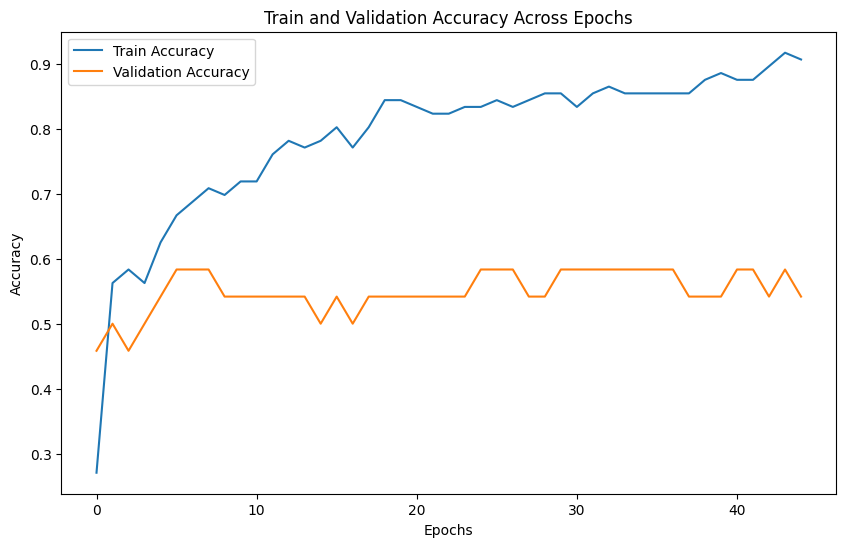

In [ ]:
# Plotting train and validation accuracy across epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test set
y_pred_probabilities = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert true labels to one-hot encoding
y_test_one_hot = to_categorical(y_test)

1/1 [==============================] - 0s 76ms/step


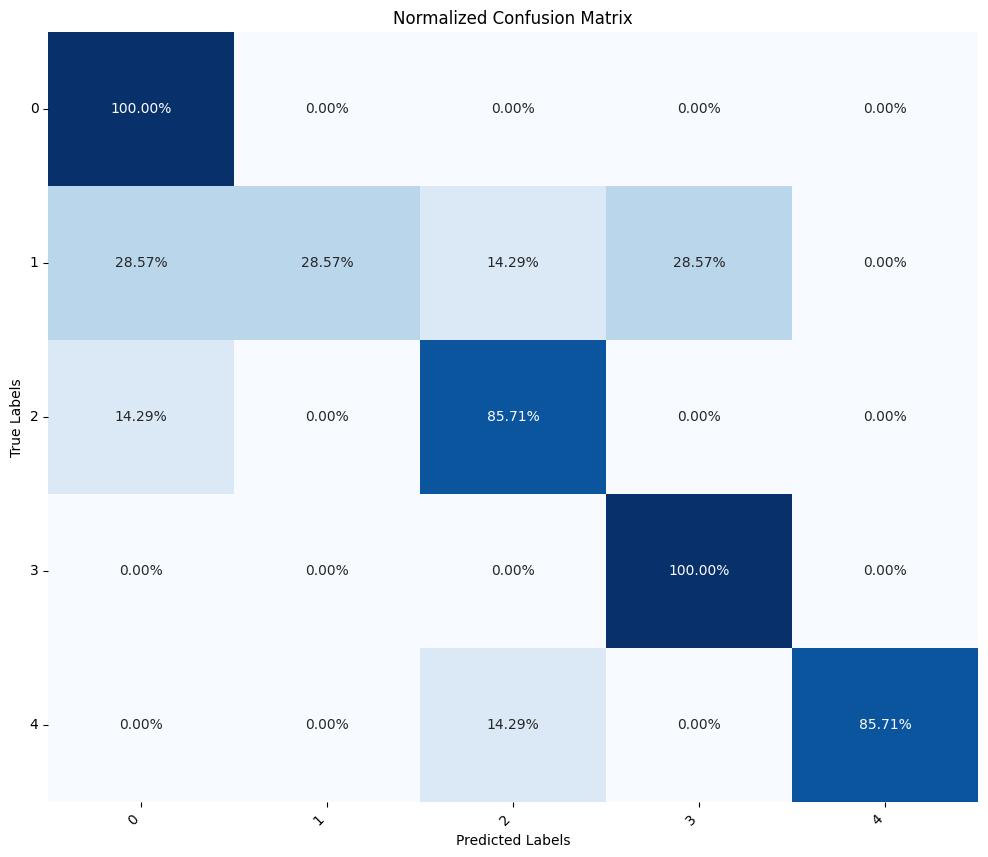

Overall Test Accuracy: 0.7666666666666667


In [ ]:
# Plot a normalized confusion matrix (percentages)
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred, normalize='true')
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cbar=False)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=1), y_pred)
print(f"Overall Test Accuracy: {accuracy}")